# Задание

Сравнить различные оптимизаторы. Для
этого:
1. Реализуйте простейшую нейронную сеть. Пускай там будет 1
внутренний слой с двумя нейронами.
2. Она должна решать задачу регрессии, где на вход подаются число x а
ответом должен быть x^2.
3. Ознакомьтесь с различными оптимизаторами градиентного спуска:
SGD, Adam, Momentum и др. В библиотеке pytorch они доступны в
модуле optim
4. Протестируйте эти оптимизаторы при тренировке модели
5. Постройте графики и сравните их поведение и скорость сходимости на
одном и том же наборе данных. Подумайте, почему поведение такое.



In [10]:
import torch  # Основная библиотека PyTorch для работы с тензорами и нейронными сетями
import torch.nn as nn  # Модуль для создания слоев нейронных сетей и их объединения
import torch.optim as optim  # Модуль с оптимизаторами для обучения нейросетей
import matplotlib.pyplot as plt  # Библиотека для визуализации (например, графиков)

In [11]:

# Создаем простую модель нейронной сети для тестирования оптимизаторов
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        # Первый линейный слой: принимает 1 вход, выдает 10 выхода (признака)
        self.linear1 = nn.Linear(1, 10)
        # Второй линейный слой: берет 10 входа, выдает 4 выход (признака)
        self.linear2 = nn.Linear(10, 4)
        # Третий линейный слой: берет 4 входа, выдает 1 выход (регрессия)
        self.linear3 = nn.Linear(4, 1)

    def forward(self, x):
        # Прямой проход: вход через первый слой
        x = self.linear1(x)
        # Затем через второй слой
        x = self.linear2(x)
        # Затем через третий слой
        x = self.linear3(x)
        return x  # Возвращаем результат

In [12]:

# Функция обучения модели с указанным оптимизатором
def train_model(optimizer_name, num_steps=100):
    model = SimpleModel()  # Создаем экземпляр модели
    criterion = nn.MSELoss()  # Функция потерь: среднеквадратичная ошибка для регрессии
    # Выбираем оптимизатор по имени
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)  # Стохастический градиентный спуск
    elif optimizer_name == 'Momentum':
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        # SGD с моментумом — помогает ускорить обучение, учитывая направление прошлых градиентов
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        # Адаптивный оптимизатор Adam, часто работает лучше для сложных задач

    losses = []  # Список для хранения значений потерь на каждом шаге

    for step in range(num_steps):
        optimizer.zero_grad()  # Обнуляем градиенты с предыдущего шага
        outputs = model(data)  # Предсказание модели на входных данных
        loss = criterion(outputs, targets)  # Вычисляем ошибку с целевыми значениями
        loss.backward()  # Обратное распространение ошибки, вычисление градиентов
        optimizer.step()  # Обновление параметров модели на основе градиентов
        losses.append(loss.item())  # Сохраняем числовое значение потерь

    return losses  # Возвращаем историю потерь

In [13]:


# Создаем данные для обучения: 100 точек от -1 до 1
data = torch.linspace(-1, 1, 100).view(-1, 1)  # Преобразуем в вектор столбец (100x1)
targets = data**2  # Целевая функция — квадраты входных значений (y = x^2)

# Список оптимизаторов для сравнения
optimizers = ['SGD', 'Momentum', 'Adam']
losses_dict = {}  # Словарь для хранения потерь для каждого оптимизатора

# Обучаем модель для каждого оптимизатора и собираем потери
for optimizer_name in optimizers:
    print(f"Training with {optimizer_name}")  # Выводим какой оптимизатор сейчас тренируем
    losses = train_model(optimizer_name)  # Обучение
    losses_dict[optimizer_name] = losses  # Сохраняем историю потерь


Training with SGD
Training with Momentum
Training with Adam


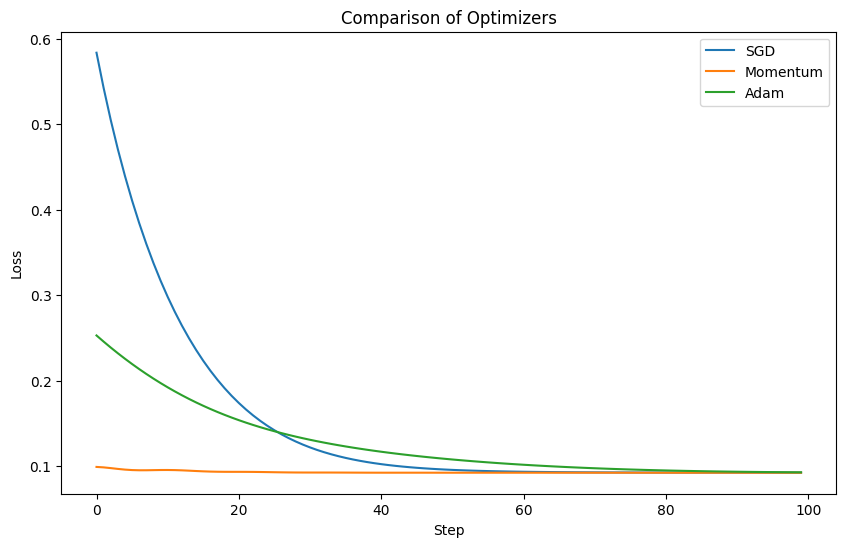

In [14]:

# Визуализация графиков потерь для всех оптимизаторов на одном рисунке
plt.figure(figsize=(10, 6))  # Размер графика
for name, losses in losses_dict.items():
    plt.plot(losses, label=name)  # Рисуем линию для каждого оптимизатора с подписью
plt.xlabel('Step')  # Подпись оси X — номер шага обучения
plt.ylabel('Loss')  # Подпись оси Y — значение функции потерь
plt.title('Comparison of Optimizers')  # Заголовок графика
plt.legend()  # Показываем легенду с названиями оптимизаторов
plt.show()  # Отображаем график
